In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

supercluster = pd.read_csv("Supercluster_iPSC_network_mRNA_all_zelllines.csv")

In [7]:
# rename cluster to the appropiate main stage

cluster_name = {5: 1, 6: 2, 2: 3, 1: 4, 4: 5, 3: 6}

cluster_end = {
    1: "pluripotency/maturation",
    2: "pluripotency",
    3: "early differentiation",
    4: "early neural progenitor",
    5: "neural progenitor_late",
    6: "nociceptor"
}

supercluster["diff_state"] = [cluster_name.get(i) for i in supercluster["hierachical_cluster"]]
supercluster["supercluster_gene"] = [cluster_end.get(i) for i in supercluster["diff_state"]]
supercluster.to_csv("end_supercluster_gene_analysis.csv")

,Unnamed: 0,external_gene_name,cluster,0,1,2,3,4,5,6,...,11,12,13,14,15,16,17,hierachical_cluster,diff_state,supercluster_gene
0,0,A1BG,bisque4,-1.009933,-0.926393,-0.900050,-0.778902,-0.638063,-1.096838,-0.639447,...,0.441897,0.636158,0.515317,0.194895,1.236746,1.212811,1.764265,3,6,nociceptor
1,1,ABHD2,bisque4,-0.792052,-0.788651,-0.791197,-1.252975,-0.995066,-0.994503,-0.581671,...,0.422731,0.885360,0.835760,1.016799,1.215740,1.281514,1.049289,3,6,nociceptor
2,2,AC003681.1,bisque4,0.621397,0.473684,-0.072030,-0.607909,0.841732,0.002464,-1.190315,...,0.504362,0.190671,-0.788582,0.167896,1.060799,0.956414,0.371635,3,6,nociceptor
3,3,AC067852.3,bisque4,-1.395012,-0.737278,-1.249986,-1.344368,-0.221268,-0.578643,0.241014,...,0.399291,0.318573,-0.400759,-0.518624,1.286129,1.419799,1.097633,3,6,nociceptor
4,4,AC087163.2,bisque4,-0.494312,-0.663351,-0.380047,-0.292224,-0.513602,0.350780,0.512961,...,0.375079,-0.002726,-1.943826,-0.343309,0.483261,1.013327,0.952143,3,6,nociceptor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,20018,TRIM35,brown4,0.564172,0.384568,1.112505,-1.615006,-1.021456,-0.815787,-0.017079,...,0.940745,-0.464627,-0.775948,-0.887494,0.174651,0.806624,-0.148142,4,5,neural progenitor_late
20000,20019,UNC13B,brown4,0.854482,0.638213,0.796213,-2.168336,-0.960272,-0.645735,-0.286789,...,0.770604,0.451806,-0.300984,0.030608,0.384496,0.077900,-0.087794,4,5,neural progenitor_late
20001,20020,USH1G,brown4,0.838723,1.038528,0.816323,-1.182848,-1.109770,-1.283811,-0.871899,...,1.491316,-0.219544,-0.017658,-0.183792,-0.024233,-0.004283,0.125275,4,5,neural progenitor_late
20002,20021,WTAPP1,brown4,0.238935,-0.034644,0.654800,-0.101023,0.309611,-0.003858,-0.443398,...,1.306421,-1.180675,0.125305,-0.487195,-1.180675,-0.896226,-0.259435,4,5,neural progenitor_late


In [10]:
# get the enriched genes pathways
import requests


def mirna_analysis_go_div(diana_df, species, cluster):
    # diana_dictionary == output von diana_only mirnas bzw. eigener DataFrame,
    # col_name is der Name der Column, die die Gene beinhaltet
    # sources = sind die sources die man gerne erhalten möchte als Liste bspw. ["GO"] wären alle Termen
    # ["GO:BP"] wäre einzig und allein Biological Process
    # KEGG ist ein optionaler parameter der angegeben kann wenn man auch an KEGG Pathways interessiert ist
    go_profiler = {}
    df_go_end = pd.DataFrame()
    for i in sorted(set(diana_df[cluster].tolist())):
        diana_df_end = diana_df.loc[diana_df[cluster] == i]
        protein_list = diana_df_end["external_gene_name"].tolist()
        print(len(protein_list))
        r = requests.post(
            url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
            json={
                'organism': species,
                'query': protein_list,
                'sources': ["GO:BP", "GO:MF", "GO:CC", "KEGG"],
            },
            headers={'User-Agent': 'FullPythonRequest'})
        try:
            data = r.json()["result"]
            parents_list = []
            go_list = []
            p_value = []
            desc_value = []
            source_list = []
            for n in data:
                go_list.append(n["native"])
                for t in n["parents"]:
                    parents_list.append(t)
            end_list = [i for i in go_list if i not in parents_list]
            for m in data:
                if m["native"] in end_list:
                    p_value.append(m["p_value"])
            for l in data:
                if l["native"] in end_list:
                    desc_value.append(l["name"])
            for l in data:
                if l["native"] in end_list:
                    source_list.append(l["source"])
            go_profiler.update({
                "p-value": p_value,
                "go-terms": end_list,
                "description": desc_value,
                "source": source_list
            })
            df_go = pd.DataFrame(
                columns=["go-terms", "description", "source", "p-value"])
            df_go["go-terms"] = list(end_list)
            df_go["description"] = desc_value
            df_go["source"] = source_list
            df_go["p-value"] = p_value
            df_go["cluster"] = df_go.shape[0] * [str(i)]
            df_go_end = df_go_end.append(df_go)

        except KeyError as e:
            pass
    df_go_end.to_excel("supercluster_gene_enrichment.xlsx")
    return (df_go_end)


def mirna_analysis_div(diana_df, species):
    # diana_dictionary == output von diana_only mirnas bzw. eigener DataFrame,
    # col_name is der Name der Column, die die Gene beinhaltet
    # sources = sind die sources die man gerne erhalten möchte als Liste bspw. ["GO"] wären alle Termen
    # ["GO:BP"] wäre einzig und allein Biological Process
    # KEGG ist ein optionaler parameter der angegeben kann wenn man auch an KEGG Pathways interessiert ist
    go_profiler = {}
    df_go_end = pd.DataFrame()
    protein_list = list(diana_df)
    r = requests.post(url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
                      json={
                          'organism': species,
                          'query': protein_list,
                          'sources': ["GO:BP", "GO:MF", "GO:CC", "KEGG"],
                      },
                      headers={'User-Agent': 'FullPythonRequest'})
    try:
        data = r.json()["result"]
        parents_list = []
        go_list = []
        p_value = []
        desc_value = []
        source_list = []
        for n in data:
            go_list.append(n["native"])
            for t in n["parents"]:
                parents_list.append(t)
        end_list = [i for i in go_list if i not in parents_list]
        for m in data:
            if m["native"] in end_list:
                p_value.append(m["p_value"])
        for l in data:
            if l["native"] in end_list:
                desc_value.append(l["name"])
        for l in data:
            if l["native"] in end_list:
                source_list.append(l["source"])
        go_profiler.update({
            "p-value": p_value,
            "go-terms": end_list,
            "description": desc_value,
            "source": source_list
        })
        df_go = pd.DataFrame(
            columns=["go-terms", "description", "source", "p-value"])
        df_go["go-terms"] = list(end_list)
        df_go["description"] = desc_value
        df_go["source"] = source_list
        df_go["p-value"] = p_value
        df_go["cluster"] = df_go.shape[0] * [str(i)]
        df_go_end = df_go_end.append(df_go)

    except KeyError as e:
        pass
    df_go_end.to_excel("supercluster_go_analysis.xlsx")
    return (df_go_end)

In [11]:
# shows the number of genes per cluster that are queried for the enrichment analysis
gene_profiling = mirna_analysis_go_div(supercluster, "hsapiens",
                                       "supercluster_gene").copy()

6057
2016
564
8027
2255
1085


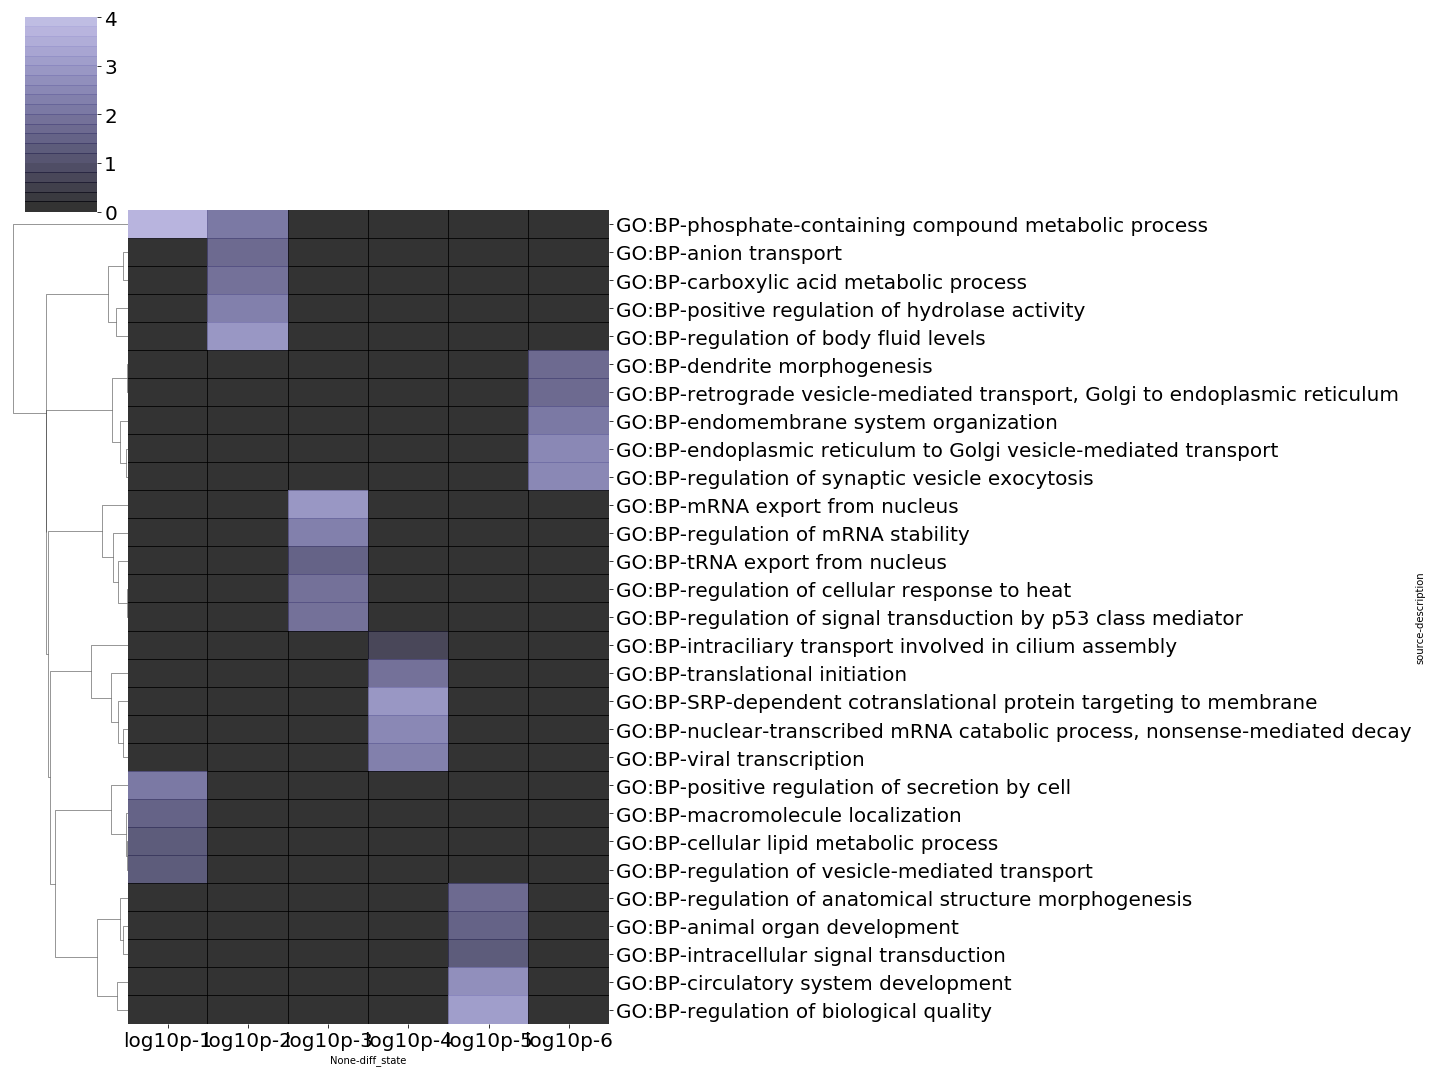

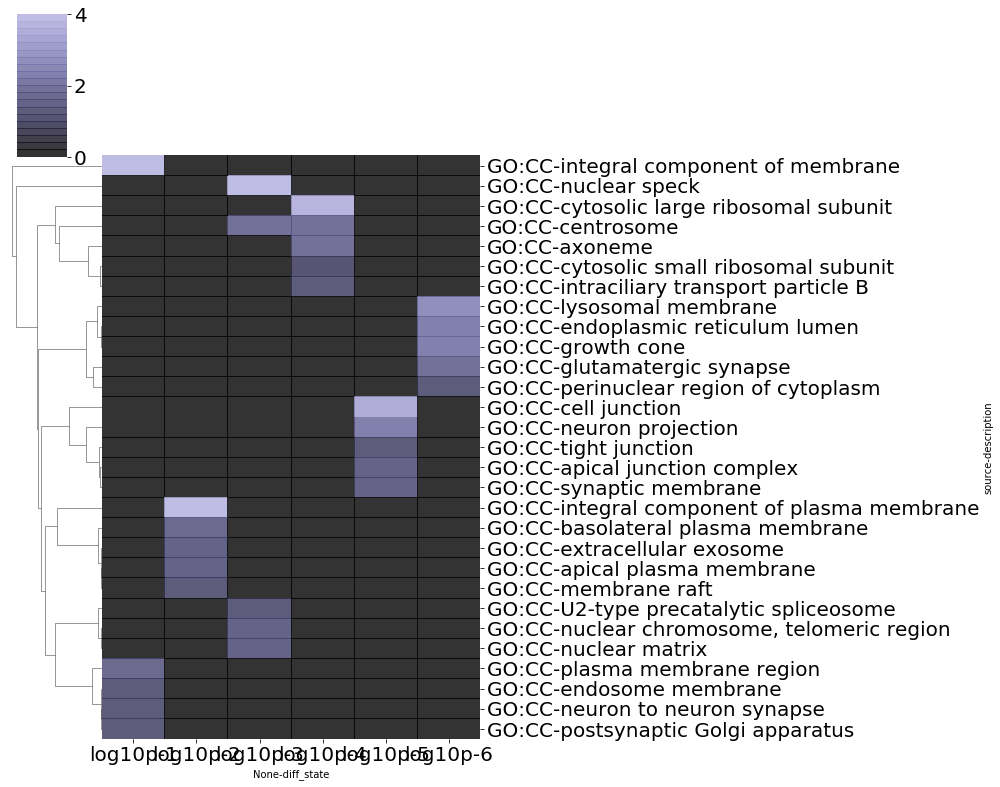

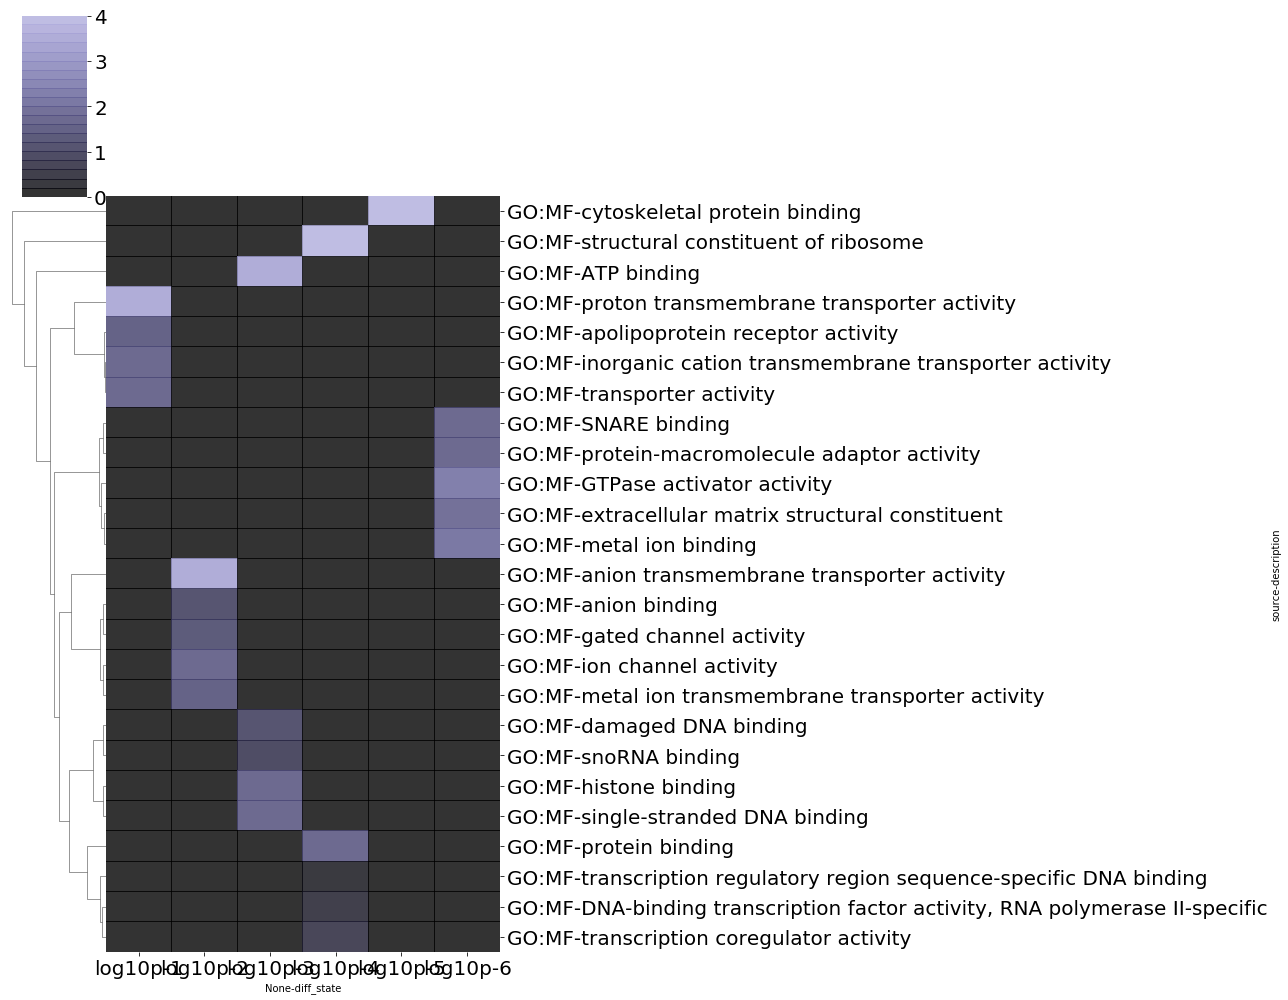

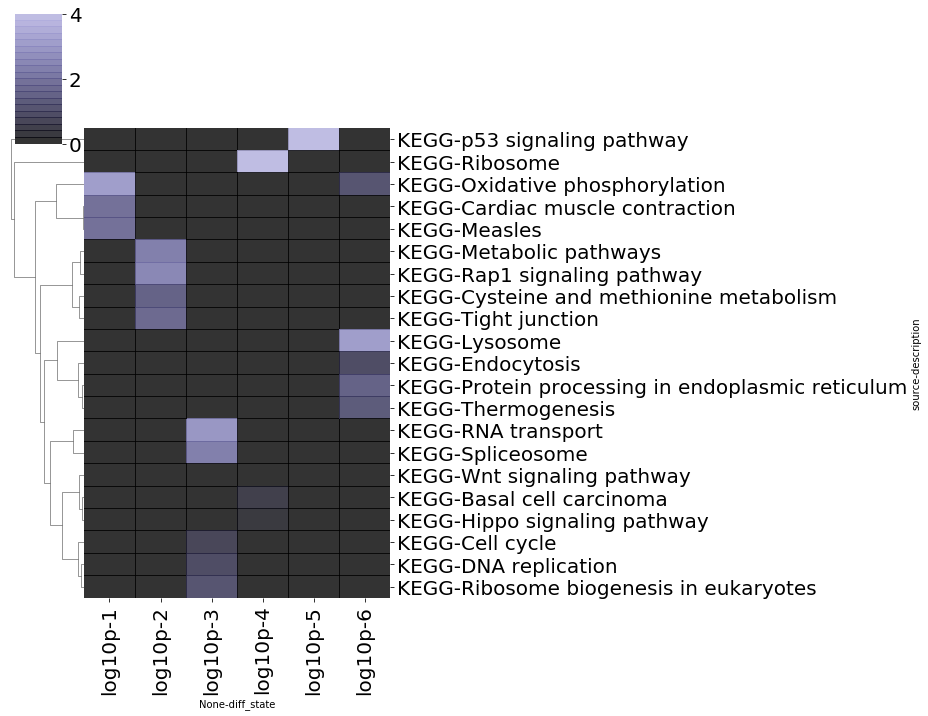

In [26]:
# here we draw heatmaps for the enrichments of each phase
plt.rcParams['svg.fonttype'] = 'none'
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
gene_profiling["log10p"] = gene_profiling["p-value"].apply(
    lambda x: -(np.log10(x)))

#give clusters ints for better sorting mechanism
cluster_gp = {
    "pluripotency/maturation": 1,
    "pluripotency": 2,
    "early differentiation": 3,
    "early neural progenitor": 4,
    "neural progenitor_late": 5,
    "nociceptor": 6
}
gene_profiling["diff_state"] = [
    cluster_gp.get(i) for i in gene_profiling["cluster"]
]
#sort the cluster accordingly

gene_profiling = gene_profiling.sort_values("diff_state", ascending=True)

#split into the different profile sources
gene_bp = gene_profiling[gene_profiling["source"] == "GO:BP"]
gene_cc = gene_profiling[gene_profiling["source"] == "GO:CC"]
gene_mf = gene_profiling[gene_profiling["source"] == "GO:MF"]
gene_kegg = gene_profiling[gene_profiling["source"] == "KEGG"]
gene_bcm = gene_profiling[gene_profiling["source"] != "KEGG"]


#use profling to get an clustermap of enrichments
def profiling(df, x, y, label):
    gene_profiling_end = df.set_index("description")
    ende = gene_profiling_end.groupby(["diff_state",
                                       "source"])['log10p'].nlargest(5)
    trial = pd.DataFrame(ende)
    sns.clustermap(
        trial.unstack(level=0, fill_value=0),
        z_score=1,
        figsize=((x, y)),
        cmap=sns.cubehelix_palette(20,
                                   start=9,
                                   rot=0,
                                   dark=0,
                                   light=.7,
                                   reverse=True),
        linewidth=0,
        row_cluster=True,
        col_cluster=False,
        yticklabels=True,
        alpha=0.8,
        vmin=0,
        vmax=4,
        annot_kws={"size": 7},
    )
    plt.savefig(label + "_enrichment.svg",
                quality=90,
                transparent=True,
                dpi=600,
                bbox_inches="tight")


profiling(gene_bp, 20, 15, "gene_bp")
profiling(gene_cc, 14, 11, "gene_cc")
profiling(gene_mf, 18, 14, "gene_mf")
profiling(gene_kegg, 13, 10, "gene_kegg")

In [27]:
# load the miR supercluster data table and set index to miRNA names
supercluster_miRNAs = pd.read_csv("miR_superclustering.csv").set_index(
    "Row.names")

In [124]:
# predict the miRNAs for each cluster
import requests
import time
import xml.etree.ElementTree as ET


def diana_only_mirnas_from_df(df, threshold, gene_name=None):
    mirna_dictionary = pd.DataFrame()
    url = "http://62.217.127.8/DianaTools/microT_CDSApi?"
    for i in set(df["cluster"].tolist()):
        df_mirna = df[df["cluster"] == i]
        if gene_name is None:
            params = {
                "mirnas": " ".join(df_mirna.index.tolist()),
                "threshold": threshold
            }
        else:
            params = {
                "genes": " ".join(gene_name),
                "mirnas": " ".join(mirna_name),
                "threshold": threshold
            }
        diana_dictionary = {"gene_name": [], "mirna_name": [], "score": []}
        r = requests.post(url=url, params=params)
        #Test ob die Eingaben passen bzw. die Connection steht
        if r.status_code != 200:
            raise OSError()
            print(r.url)
        root_test = ET.fromstring(r.content)
        number_liste = []
        for n in root_test.iter("number-of-pages"):
            h = int(n.text)
        for t in range(1, h + 1):
            print("progress:" + str(t) + "|" + str(h))
            time.sleep(0.5)
            if gene_name is None:
                params = {
                    "mirnas": " ".join(df_mirna.index.tolist()),
                    "threshold": threshold,
                    "page": t
                }
            else:
                params = {
                    "genes": " ".join(gene_name),
                    "mirnas": " ".join(mirna_name),
                    "threshold": threshold
                }
            r = requests.post(url=url, params=params)
            root = ET.fromstring(r.content)
            for interaction in root.iter("interaction"):
                diana_dictionary["mirna_name"].append(
                    interaction.attrib["mirnaName"])
                diana_dictionary["gene_name"].append(
                    interaction.attrib["geneName"])
                diana_dictionary["score"].append(interaction.attrib["score"])
        diana = pd.DataFrame(diana_dictionary)
        diana["cluster"] = diana.shape[0] * [str(i)]
        mirna_dictionary = mirna_dictionary.append(diana)

    return mirna_dictionary

In [24]:
mirna_prediction = diana_only_mirnas_from_df(supercluster_miRNAs, 0.5)

progress:1|309
progress:2|309
progress:3|309
progress:4|309
progress:5|309
progress:6|309


KeyboardInterrupt: 

In [29]:
#mirna_prediction.to_csv(pfad + "iPSC_mirna_predictions.csv")
mirna_prediction = pd.read_csv("iPSC_mirna_predictions.csv")

In [30]:
mirna_prediction["gene_id"] = [
    i.split(" ")[0] for i in mirna_prediction["gene_name"]
]
mirna_prediction["gene_symbol"] = [
    i.split(" ")[1].replace("(", "").replace(")", "")
    for i in mirna_prediction["gene_name"]
]
mirna_prediction = mirna_prediction.drop("gene_name", axis=1)

In [36]:
#here we should load the mean base expression for each miRNA

mirna_expression = pd.read_csv("mirna_base_expression.csv")

,Row.names,baseMean
0,hsa-let-7a-2-3p,1.018431
1,hsa-let-7a-3p,3.642496
2,hsa-let-7a-5p,73.904539
3,hsa-let-7b-3p,0.587272
4,hsa-let-7b-5p,102.349172
...,...,...
2647,hsa-miR-9986,0.000000
2648,hsa-miR-99a-3p,5.872323
2649,hsa-miR-99a-5p,19400.648116
2650,hsa-miR-99b-3p,4505.245030


In [33]:
#load the human validation databases
starbase_hsa = pd.read_csv("starBaseV3_hsa.txt", delimiter="\t")
mirTarbase = pd.ExcelFile("miRTarBase_MTI.xlsx")
df_mirT = mirTarbase.parse("miRTarBase")
df_mirT = df_mirT.loc[df_mirT["Species (miRNA)"] == "Homo sapiens"]
tarbase = pd.read_csv("TarBase_v8_download.txt", delimiter="\t")
tarbase_liste = tarbase["geneName"].str.split("(", n=1, expand=True)
tarbase_liste = [str(i) for i in tarbase_liste[0]]
tarbase["gene_name"] = tarbase_liste # get only positive interactions of miRNA mRNAs
tarbase = tarbase.loc[(tarbase["positive_negative"] == "POSITIVE")& (tarbase["species"] == "Homo sapiens")]

/Users/maximilianzeidler/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
validation = pd.DataFrame()
validation["mirna"] = starbase_hsa["miRNAname"].tolist() + df_mirT["miRNA"].tolist() + tarbase["mirna"].tolist()
validation["gene"] = starbase_hsa["geneName"].tolist() + df_mirT["Target Gene"].tolist() + tarbase["gene_name"].tolist()
validation = validation.drop_duplicates()

In [ ]:
from scipy import stats


def correlation_mirna_gene(df, df1):
    
    """get the correlation between each miRNA and genes"""
    df_gc = df.set_index("external_gene_name")
    df_gc = df_gc.iloc[:, 2:-3]
    df_mc = df1.iloc[:, 1:-1]
    print(df_gc, df_mc)
    correlation_dict = {
        "gene_name": [],
        "mirna": [],
        "correlation": [],
        "p-value": []
    }
    
    for i in df_gc.iterrows():
        for t in df_mc.iterrows():
            correlation = stats.pearsonr(i[1], t[1])
            correlation_dict["gene_name"].append(i[0])
            correlation_dict["mirna"].append(t[0])
            correlation_dict["correlation"].append(correlation[0])
            correlation_dict["p-value"].append(correlation[1])

    result = pd.DataFrame(correlation_dict)
    return result


correlation_mirna_gene = correlation_mirna_gene(supercluster,
                                                supercluster_miRNAs)

In [38]:
# merge cluster with table
gene_cluster = supercluster.set_index("external_gene_name")
gene_cluster = gene_cluster[["cluster", "supercluster_gene"]]
mirna_cluster = supercluster_miRNAs.iloc[:, [0, -1]]
gesamt = pd.merge(correlation_mirna_gene,
                  gene_cluster,
                  how="left",
                  left_on="gene_name",
                  right_on=gene_cluster.index)
gesamt = pd.merge(gesamt,
                  mirna_cluster,
                  how="left",
                  left_on="mirna",
                  right_on=mirna_cluster.index)
gesamt.columns = [
    "gene_name", "mirna", "correlation", "p_value", "cluster_gene",
    "supercluster_gene", "cluster_mirna", "supercluster_mirna"
]

                    Unnamed: 0  cluster         0         1         2  \
external_gene_name                                                      
A1BG                         0  bisque4 -1.009933 -0.926393 -0.900050   
ABHD2                        1  bisque4 -0.792052 -0.788651 -0.791197   
AC003681.1                   2  bisque4  0.621397  0.473684 -0.072030   
AC067852.3                   3  bisque4 -1.395012 -0.737278 -1.249986   
AC087163.2                   4  bisque4 -0.494312 -0.663351 -0.380047   
...                        ...      ...       ...       ...       ...   
TRIM35                   20018   brown4  0.564172  0.384568  1.112505   
UNC13B                   20019   brown4  0.854482  0.638213  0.796213   
USH1G                    20020   brown4  0.838723  1.038528  0.816323   
WTAPP1                   20021   brown4  0.238935 -0.034644  0.654800   
ZNF488                   20022   brown4  1.179074  1.107315  1.156010   

                           3         4         5  

In [39]:
#construct the valdiation database with prediction and valdiaation 
validation["validated"] = validation.shape[0] * [1]
end_validated = pd.merge(gesamt,
                         validation,
                         how="left",
                         left_on=["gene_name", "mirna"],
                         right_on=["gene", "mirna"])
end_validated = end_validated.drop("gene", axis=1)
end_validated.fillna(0, inplace=True)

In [40]:


end_pval = pd.merge(end_validated,
                    mirna_prediction,
                    how="left",
                    left_on=["gene_name", "mirna"],
                    right_on=["gene_symbol", "mirna_name"])
end_pval = end_pval.drop(["mirna_name", "cluster", "gene_id", "gene_symbol"],
                         axis=1)
end_pval.fillna(0, inplace=True)

In [41]:
end_pval = end_pval.drop("Unnamed: 0", axis=1)
end_pval.columns = [
    'gene_name', 'mirna', 'correlation', 'p_value', 'cluster_gene',
    'supercluster_gene', 'cluster_mirna', 'supercluster_mirna', 'validated',
    'diana_score'
]

end_pval['diana_score'] = end_pval['diana_score'].astype('float64') # convert DIANA score into float
#intergrate the expression scale of miRNAs into the analysis
mirna_expression["scaled_expression"] = mirna_expression[ "baseMean"] / mirna_expression["baseMean"].max()
all_score = pd.merge(end_pval,
                     mirna_expression,
                     how="left",
                     left_on="mirna",
                     right_on="Row.names")

In [42]:
#remove possible duplicates introduced
all_score = all_score.drop_duplicates(subset=["gene_name", 'mirna'])

In [43]:
#rank miRNA expression based on percentile count expression
all_score["ranking"] = pd.qcut(all_score["baseMean"], 100, range(1, 101))
all_score["ranking"] = [i / 100 for i in all_score["ranking"]]

In [44]:
# determine the genes that are negatively correlated
negative_correlating = all_score

#calculate the endscore for miRNA mRNA interactions
negative_correlating["score"] = ((negative_correlating["validated"] + negative_correlating["diana_score"]) *
    abs(negative_correlating["correlation"])
) * negative_correlating["ranking"] * 100

# only consider gene miRNA interaction with a score above 0
negative_end = negative_correlating.loc[negative_correlating["score"] > 0]
negative_end.to_csv("mirna_edges.csv")

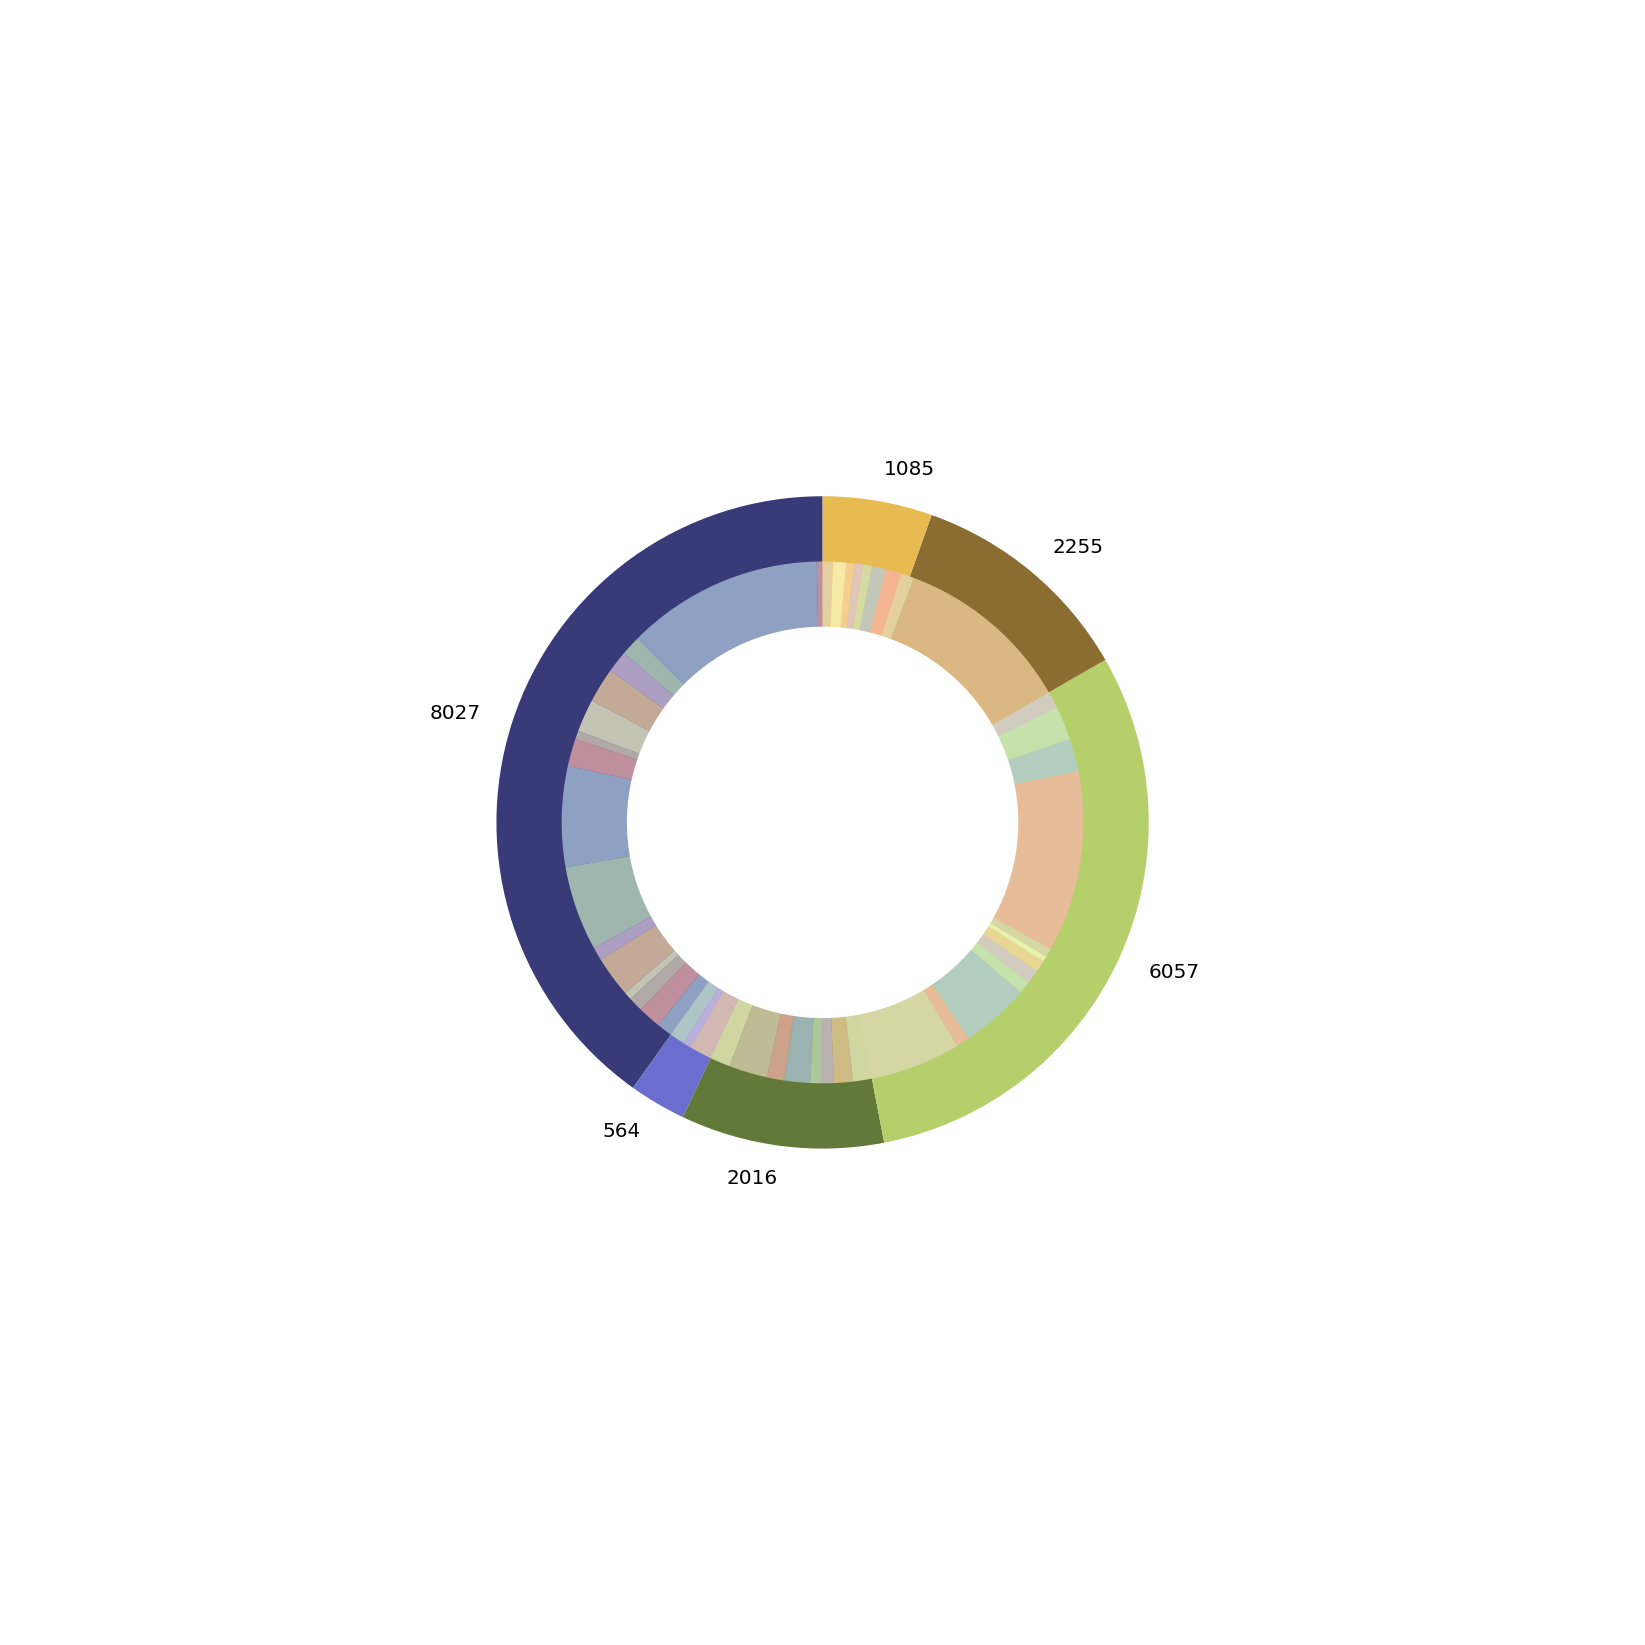

In [45]:
# make a pie chart of clusters per genes found
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import cm
cmap = plt.get_cmap("tab20b")
cmap2 = plt.get_cmap("Pastel1")
outer_colors = cmap(np.arange(7) * 2)
inner_colors = cmap2(np.array(range(7)))
pie_mrna = pd.DataFrame(
    supercluster.sort_values(
        "diff_state",
        ascending=False)["diff_state"].value_counts()[supercluster.sort_values(
            "diff_state", ascending=False)["diff_state"].unique()])
pi_sub_mrna = pd.DataFrame(
    supercluster.sort_values(
        "diff_state",
        ascending=False)["cluster"].value_counts()[supercluster.sort_values(
            "diff_state", ascending=False)["cluster"].unique()])
#pie_mirna = pd.DataFrame(supercluster_miRNAs["hierachical_cluster"].value_counts())

fig, ax = plt.subplots(figsize=(30, 30))
plt.pie(pie_mrna["diff_state"],
        radius=0.5,
        startangle=90,
        frame=True,
        labels=pie_mrna["diff_state"],
        colors=outer_colors)
plt.pie(pi_sub_mrna["cluster"],
        radius=0.4,
        startangle=90,
        colors=inner_colors,
        wedgeprops={'alpha': 0.7})
centre_circle = plt.Circle((0, 0), 0.3, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("circular_plot_mRNA_power16.svg",
            quality=90,
            transparent=True,
            dpi=600)